# Get Packages

In [3]:
!pip install wget
!pip install Sastrawi
!pip install nlp_id
!pip install unidecode
!pip install --upgrade gensim
!pip install sparknlp
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=e97b3651c7dfb4a604f8a01cbe8e0d79cda6ab06ef4ea24b1e023bc0ab9dbcf5
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import re
import os
import pickle
import warnings
import wget
import sklearn
import random
import nltk
import spacy
import textblob
import gensim
import Sastrawi
import sparknlp
from sparknlp.base import DocumentAssembler
from gensim.models import Word2Vec
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
# from keras.utils.data_utils import pad_sequences
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from nltk.corpus import stopwords
from nltk.tree import Tree
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter, OrderedDict
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from spacy.util import minibatch, compounding
from spacy import load, displacy
from spacy.training.example import Example
from nlp_id import stopword
from unidecode import unidecode
import io
import time
from datetime import timedelta
import logging
from gensim.models import FastText
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras import backend as K
from keras.optimizers.legacy import Adam
from sparknlp.annotator import ContextSpellCheckerModel, NorvigSweetingModel, SymmetricDeleteModel
logging.basicConfig(level=logging.INFO)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Spell Checker

### Norvig

In [6]:
# def words(text): return re.findall(r'\w+', text.lower())

# path_corpus =

# Text Preprocessing

In [7]:
df = pd.read_csv('./sample_data/tweet.csv')

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [9]:
tweet = df['tweet']
display(tweet[0])
display(tweet)

'Kata @prabowo Indonesia tidak dihargai bangsa asing!   Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â\xa0â€¦'

0       Kata @prabowo Indonesia tidak dihargai bangsa ...
1       Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2       Di era Jokowi, ekonomi Indonesia semakin baik....
3       Bagi Sumatera Selatan, Asian Games berdampak p...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak @jokowi mengubah cara pandang ekonomi. Kin...
Name: tweet, Length: 1815, dtype: object

## Text Cleaning

In [10]:
tweet_cleaned = []

  # Looping setiap kalimat
for sentence in tweet:
    sentence = re.sub(r"#\w+", "", sentence)

    sentence = sentence.replace('@', '')

    sentence = re.sub(r"(pic.twitter.com/[^\s]+)", '', sentence)

    sentence = re.sub(r"\s+", " ", sentence)

    sentence = sentence.strip()

    tweet_cleaned.append(sentence)

display(tweet[0])
print('-'*50)
display(tweet_cleaned[0])

'Kata @prabowo Indonesia tidak dihargai bangsa asing!   Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â\xa0â€¦'

--------------------------------------------------


'Kata prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦'

### Remove URL LINK

In [11]:
pattern = r"(https?://.[^\s]+)"
tweet_no_url = [re.sub(pattern, "", sentence) for sentence in tweet_cleaned]

display(tweet_cleaned[0])
print('-'*50)
display(tweet_no_url[0])

'Kata prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦'

--------------------------------------------------


'Kata prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan rockygerung?ðŸ˜œ  â€¦'

### Remove Punctuation & Special Character

In [12]:
def remove_punctuation(sentences):
  """Menghilangkan punctuation dari list kalimat."""

  # Buat regular expression untuk punctuation
  regex = re.compile(r"[^a-zA-Z0-9]")

  # Hapus punctuation dari setiap kalimat
  for sentence in sentences:
    sentence = regex.sub("", sentence)

  return sentences

def remove_punctuation_and_special_character(text):
  # clean puntuation and special character using regex
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return cleaned_text

In [13]:
# regex = re.compile(r"[^a-zA-Z0-9]")

tweet_no_punct = []
for idx in range(len(tweet_no_url)):
  cleaned = remove_punctuation_and_special_character(tweet_no_url[idx])
  tweet_no_punct.append(cleaned)

print(tweet_no_url[0])
print(tweet_no_punct[0])


Kata prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan rockygerung?ðŸ˜œ  â€¦
Kata prabowo Indonesia tidak dihargai bangsa asing Berita ini  pasti hoax buatan penguasa ya kan rockygerung  


### Remove Double Space

In [14]:
tweet_cleaned_double_space = []
def remove_double_space(text):
    cleaned_text = re.sub(r"\s+", " ", text)
    return cleaned_text

for index in range(len(tweet_no_punct)):
    text = remove_double_space(tweet_no_punct[index])
    tweet_cleaned_double_space.append(text)

print(tweet_no_punct[0])
print(tweet_cleaned_double_space[0])

Kata prabowo Indonesia tidak dihargai bangsa asing Berita ini  pasti hoax buatan penguasa ya kan rockygerung  
Kata prabowo Indonesia tidak dihargai bangsa asing Berita ini pasti hoax buatan penguasa ya kan rockygerung 


### Remove Stopwords

In [15]:
stop_factory = StopWordRemoverFactory()
# more_stopword = [‘dengan’, ‘ia’,’bahwa’,’oleh’]
# data = stop_factory.get_stop_words()+more_stopword
data = stop_factory.get_stop_words()
stopword_remover = stop_factory.create_stop_word_remover()
print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [16]:
raw_stopwords = ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun']

In [17]:
def remove_stopwords(text):
    # Kode untuk menghapus stopwords
    stop_words = set(stopwords.words('indonesian'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

def remove_stopwords_sastrawi(text):
    # Kode untuk menghapus stopwords
    text_lower = text.lower()
    stop_words = set(raw_stopwords)
    tokens = word_tokenize(text_lower)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

In [18]:
tweet_no_stopwords = []
for index in range(len(tweet_cleaned_double_space)):
    cleaned_text = remove_stopwords_sastrawi(tweet_cleaned_double_space[index])
    tweet_no_stopwords.append(cleaned_text)

display(tweet_cleaned_double_space[0])
display(tweet_no_stopwords[0])

'Kata prabowo Indonesia tidak dihargai bangsa asing Berita ini pasti hoax buatan penguasa ya kan rockygerung '

'kata prabowo indonesia tidak dihargai bangsa asing berita hoax buatan penguasa ya kan rockygerung'

In [19]:
display(tweet_cleaned_double_space[2])
display(tweet_no_stopwords[2])
print('--'*50)
display(tweet_cleaned_double_space[3])
display(tweet_no_stopwords[3])
print('--'*50)
display(tweet_cleaned_double_space[4])
display(tweet_no_stopwords[4])
print('--'*50)
display(tweet_cleaned_double_space[5])
display(tweet_no_stopwords[5])
print('--'*50)

'Di era Jokowi ekonomi Indonesia semakin baik'

'era jokowi ekonomi indonesia semakin baik'

----------------------------------------------------------------------------------------------------


'Bagi Sumatera Selatan Asian Games berdampak pd ekonomi langsung diprediksi mencapai 185 triliun Indonesia maju Jokowi hebat'

'sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 185 triliun indonesia maju jokowi hebat'

----------------------------------------------------------------------------------------------------


'Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan Penghasilan negara itu ya dari pajak'

'negara ngutang buat bngun infrastruktur udah dipake masyarakat terus masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar kalo negara dapet penghasilan penghasilan negara ya pajak'

----------------------------------------------------------------------------------------------------


'Yg bisikin pak jokowi cm mikirin perputaran duit di golongan tertentu ESports hanya sebagian kecil dr sekian besar penentu pertumbuhan perekonomian Indonesia bukan hal fundamental Betul yg dikatakan prabowo walau dgn bhs yg sederhana tp mrpkan aspek fundamental ekonomi'

'yg bisikin pak jokowi cm mikirin perputaran duit golongan tertentu esports sebagian kecil dr sekian besar penentu pertumbuhan perekonomian indonesia bukan fundamental betul yg dikatakan prabowo dgn bhs yg sederhana tp mrpkan aspek fundamental ekonomi'

----------------------------------------------------------------------------------------------------


## Normalization

### Stemming

In [20]:
def normalization_stemming(text):
  # create an instance of the stemmer
  stemmer = StemmerFactory().create_stemmer()

  # perform stemming
#   cleaned_text = stemmer.stem(text)
  cleaned_text = stemmer.stem(text)
  return cleaned_text

In [21]:
normalized_stemming = []
for idx in range(len(tweet_no_stopwords)):
    normalized = normalization_stemming(tweet_no_stopwords[idx])
    normalized_stemming.append(normalized)

display(tweet_no_stopwords[1])
display(normalized_stemming[1])

'batuan langka tasbih jokowi hadiah habib luthfi seharga mercy'

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

In [22]:
display(tweet_no_stopwords[1])
display(normalized_stemming[1])
print('--'*30)
display(tweet_no_stopwords[2])
display(normalized_stemming[2])
print('--'*30)
display(tweet_no_stopwords[3])
display(normalized_stemming[3])
print('--'*30)
display(tweet_no_stopwords[4])
display(normalized_stemming[4])
print('--'*30)
display(tweet_no_stopwords[5])
display(normalized_stemming[5])
print('--'*30)

'batuan langka tasbih jokowi hadiah habib luthfi seharga mercy'

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

------------------------------------------------------------


'era jokowi ekonomi indonesia semakin baik'

'era jokowi ekonomi indonesia makin baik'

------------------------------------------------------------


'sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 185 triliun indonesia maju jokowi hebat'

'sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 185 triliun indonesia maju jokowi hebat'

------------------------------------------------------------


'negara ngutang buat bngun infrastruktur udah dipake masyarakat terus masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar kalo negara dapet penghasilan penghasilan negara ya pajak'

'negara ngutang buat bngun infrastruktur udah dipake masyarakat terus masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak'

------------------------------------------------------------


'yg bisikin pak jokowi cm mikirin perputaran duit golongan tertentu esports sebagian kecil dr sekian besar penentu pertumbuhan perekonomian indonesia bukan fundamental betul yg dikatakan prabowo dgn bhs yg sederhana tp mrpkan aspek fundamental ekonomi'

'yg bisikin pak jokowi cm mikirin putar duit golong tentu esports bagi kecil dr sekian besar tentu tumbuh ekonomi indonesia bukan fundamental betul yg kata prabowo dgn bhs yg sederhana tp mrpkan aspek fundamental ekonomi'

------------------------------------------------------------


In [25]:
def normalization_lemmatizing(text):
  lemmatizer = WordNetLemmatizer()
  lemmatized = lemmatizer.lemmatize(text)
  return lemmatized

In [26]:
# normalized_lemmatizing = []
# for idx in range(len(tweet_no_stopwords)):
#     new = normalization_lemmatizing(tweet_no_stopwords[idx])
#     normalized_lemmatizing.append(new)

# display(tweet_no_stopwords[1])
# display(normalized_lemmatizing[1])

In [27]:
# tweet_no_slang

In [28]:
# normalized_stemming_no_slang

# Tokenization

In [29]:
def word_tokenization(text):
  tokens = word_tokenize(text)
  return tokens

In [30]:
tweet_w_tokens = []

for idx in range(len(normalized_stemming)):
  tokens = word_tokenization(normalized_stemming[idx])
  tweet_w_tokens.append(tokens)

display(normalized_stemming[0])
display(tweet_w_tokens[0])

'kata prabowo indonesia tidak harga bangsa asing berita hoax buat kuasa ya kan rockygerung'

['kata',
 'prabowo',
 'indonesia',
 'tidak',
 'harga',
 'bangsa',
 'asing',
 'berita',
 'hoax',
 'buat',
 'kuasa',
 'ya',
 'kan',
 'rockygerung']

In [31]:
tweet_w_tokens

[['kata',
  'prabowo',
  'indonesia',
  'tidak',
  'harga',
  'bangsa',
  'asing',
  'berita',
  'hoax',
  'buat',
  'kuasa',
  'ya',
  'kan',
  'rockygerung'],
 ['batu',
  'langka',
  'tasbih',
  'jokowi',
  'hadiah',
  'habib',
  'luthfi',
  'harga',
  'mercy'],
 ['era', 'jokowi', 'ekonomi', 'indonesia', 'makin', 'baik'],
 ['sumatera',
  'selatan',
  'asi',
  'games',
  'dampak',
  'pd',
  'ekonomi',
  'langsung',
  'prediksi',
  'capai',
  '185',
  'triliun',
  'indonesia',
  'maju',
  'jokowi',
  'hebat'],
 ['negara',
  'ngutang',
  'buat',
  'bngun',
  'infrastruktur',
  'udah',
  'dipake',
  'masyarakat',
  'terus',
  'masyarakat',
  'ngeluh',
  'negara',
  'ngutang',
  'negara',
  'ngutang',
  'utang',
  'bayar',
  'kalo',
  'negara',
  'dapet',
  'hasil',
  'hasil',
  'negara',
  'ya',
  'pajak'],
 ['yg',
  'bisikin',
  'pak',
  'jokowi',
  'cm',
  'mikirin',
  'putar',
  'duit',
  'golong',
  'tentu',
  'esports',
  'bagi',
  'kecil',
  'dr',
  'sekian',
  'besar',
  'tentu',


# Vectorization

In [32]:
 normalized_array_data = np.array(normalized_stemming)
 normalized_array_data
 display(normalized_array_data.shape)

(1815,)

In [33]:
vectorizer = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

In [34]:
# tweet_vectorized = []

# for idx in range(len(normalized_array_data)):
#   vectorized = vectorizer.fit_transform(normalized_array_data[idx])
#   tweet_vectorized.append(vectorized)

tweet_vectorized = vectorizer.fit_transform(normalized_array_data)
# tweet_vectorized = vectorizer.fit(normalized_array_data)

display(normalized_array_data[1])
display(tweet_vectorized[1])

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

<1x5816 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [35]:
tweet_vectorized

<1815x5816 sparse matrix of type '<class 'numpy.int64'>'
	with 31791 stored elements in Compressed Sparse Row format>

In [36]:
print(tweet_vectorized)

  (0, 2467)	1
  (0, 4255)	1
  (0, 2059)	1
  (0, 5359)	1
  (0, 1888)	1
  (0, 547)	1
  (0, 435)	1
  (0, 699)	1
  (0, 1963)	1
  (0, 902)	1
  (0, 2796)	1
  (0, 5753)	1
  (0, 2424)	1
  (0, 4528)	1
  (1, 1888)	1
  (1, 594)	1
  (1, 2875)	1
  (1, 5219)	1
  (1, 2317)	1
  (1, 1852)	1
  (1, 1842)	1
  (1, 3023)	1
  (1, 3300)	1
  (2, 2059)	1
  (2, 2317)	1
  :	:
  (1812, 554)	1
  (1812, 478)	1
  (1813, 547)	1
  (1813, 2317)	1
  (1813, 1469)	1
  (1813, 3061)	1
  (1813, 3902)	1
  (1813, 5800)	1
  (1813, 4599)	1
  (1813, 560)	1
  (1814, 2059)	1
  (1814, 2317)	1
  (1814, 1469)	1
  (1814, 3902)	1
  (1814, 5548)	1
  (1814, 2186)	1
  (1814, 3849)	1
  (1814, 4795)	1
  (1814, 2907)	1
  (1814, 1986)	1
  (1814, 973)	1
  (1814, 3938)	1
  (1814, 4323)	1
  (1814, 2636)	1
  (1814, 1457)	1


In [37]:
tweet_vectorized_array = tweet_vectorized.toarray()
# tweet_vectorized = np.array(tweet_vectorized)
new_df = pd.DataFrame(data=tweet_vectorized_array, columns= vectorizer.get_feature_names_out())
new_df

,01,01bpk,02,02pak,02petaninelayanpeternak,08,0850,10,100,1000,...,yuuk,zaenal,zakat,zaman,zer,zero,ziarah,zippo,zon,zonk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
new_df.shape

(1815, 5816)

In [39]:
new_df[1:]

,01,01bpk,02,02pak,02petaninelayanpeternak,08,0850,10,100,1000,...,yuuk,zaenal,zakat,zaman,zer,zero,ziarah,zippo,zon,zonk
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split Data

In [40]:
# df = pd.read_csv('./sample_data/tweet.csv')

In [41]:
print(df['sentimen'].value_counts)
print(df.head())
display(df)

<bound method IndexOpsMixin.value_counts of 0       negatif
1        netral
2        netral
3       positif
4       negatif
         ...   
1810     netral
1811     netral
1812     netral
1813     netral
1814     netral
Name: sentimen, Length: 1815, dtype: object>
   Unnamed: 0 sentimen                                              tweet
0           0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1           1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2           2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3           3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4           4  negatif  Negara kita ngutang buat bngun infrastruktur y...


,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [42]:
mapping = {
    "negatif": 0,
    "netral": 1,
    "positif": 1
}

df['sentimen'] = [mapping[label] for label in df['sentimen']]
target = df['sentimen']


In [43]:
X = pd.DataFrame(normalized_stemming, columns=['tweet'])
Y = target

display(X)
display(Y)

,tweet
0,kata prabowo indonesia tidak harga bangsa asin...
1,batu langka tasbih jokowi hadiah habib luthfi ...
2,era jokowi ekonomi indonesia makin baik
3,sumatera selatan asi games dampak pd ekonomi l...
4,negara ngutang buat bngun infrastruktur udah d...
...,...
1810,negarawan sejati sll bangga depan harga diri b...
1811,1 hrs ceramah damai indonesia 2 ekonomi makin ...
1812,bangun bangsa dgn dukung ekonomi negara sama p...
1813,bantu maju ekonomi bangsa sama pak jokowi yuk


0       0
1       1
2       1
3       1
4       0
       ..
1810    1
1811    1
1812    1
1813    1
1814    1
Name: sentimen, Length: 1815, dtype: int64

In [44]:
display(X)

,tweet
0,kata prabowo indonesia tidak harga bangsa asin...
1,batu langka tasbih jokowi hadiah habib luthfi ...
2,era jokowi ekonomi indonesia makin baik
3,sumatera selatan asi games dampak pd ekonomi l...
4,negara ngutang buat bngun infrastruktur udah d...
...,...
1810,negarawan sejati sll bangga depan harga diri b...
1811,1 hrs ceramah damai indonesia 2 ekonomi makin ...
1812,bangun bangsa dgn dukung ekonomi negara sama p...
1813,bantu maju ekonomi bangsa sama pak jokowi yuk


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X.tweet, Y, test_size=0.3, random_state=0)

In [53]:
# X_train = [str(text) for text in X_train if isinstance(text, str)]
X_train = [str(text).lower() if isinstance(text, str) else str(text) for text in X_train]
max_words = 1000
max_len = 150
tok = Tokenizer()
tok.fit_on_texts(X_train)
sequence = tok.texts_to_sequences(X_train)
sequence_matrix = pad_sequences(sequence, maxlen=max_len)

In [54]:
sequence_matrix

array([[   0,    0,    0, ...,  660, 1963, 1335],
       [   0,    0,    0, ...,  562,  198,  162],
       [   0,    0,    0, ...,  171,  144, 1968],
       ...,
       [   0,    0,    0, ..., 1945,  414,  881],
       [   0,    0,    0, ...,   26, 4741, 1819],
       [   0,    0,    0, ...,  249,   55,    7]], dtype=int32)

In [55]:

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))


In [56]:
len(sequence_matrix)

1270

In [57]:
len(Y_train)

1270

In [81]:


# Tokenization and padding
max_words = 20000  # Maximum number of words in the vocabulary
max_len = 40  # Maximum length of a tweet

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequence = tok.texts_to_sequences(X_train)
sequence_matrix = pad_sequences(sequence, maxlen=max_len)
kernel_size = 3

# Create a Sequential model
model = Sequential()

# Add an Embedding layer
embedding_dim = 64  # Dimension of word embeddings
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

# Add Droput
model.add(Dropout(rate=0.4))

# Add an CNN layer
model.add(Conv1D(600, kernel_size, padding='valid', activation='relu', strides=1))
model.add(Conv1D(300, kernel_size, padding='valid', activation='relu', strides=1))
model.add(Conv1D(150, kernel_size, padding='valid', activation='relu', strides=1))
model.add(Conv1D(75, kernel_size, padding='valid', activation='relu', strides=1))

# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

#add fc1 units
fc1_units = 600
model.add(Dense(units=fc1_units))

# activation
model.add(Activation('relu'))

# Add Droput
model.add(Dropout(rate=0.5))

# Add a Dense (fully connected) layer for output
num_classes = 1  # Number of sentiment classes (positive and negative)
model.add(Dense(units=num_classes,))

# Activation
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 40, 64)            1280000   
                                                                 
 dropout_10 (Dropout)        (None, 40, 64)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 38, 600)           115800    
                                                                 
 conv1d_6 (Conv1D)           (None, 36, 300)           540300    
                                                                 
 conv1d_7 (Conv1D)           (None, 34, 150)           135150    
                                                                 
 conv1d_8 (Conv1D)           (None, 32, 75)            33825     
                                                                 
 flatten_4 (Flatten)         (None, 2400)             

In [82]:
# Train the model
model.fit(
    sequence_matrix,
    Y_train,
    batch_size=256, epochs=20,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/20
4/4 [==============================] - 7s 792ms/step - loss: 0.6593 - accuracy: 0.6289 - precision: 0.6657 - recall: 0.9054 - f1_score: 0.7582 - val_loss: 0.6181 - val_accuracy: 0.6929 - val_precision: 0.6929 - val_recall: 1.0000 - val_f1_score: 0.8186
Epoch 2/20
4/4 [==============================] - 1s 169ms/step - loss: 0.6301 - accuracy: 0.6663 - precision: 0.6664 - recall: 1.0000 - f1_score: 0.7997 - val_loss: 0.6126 - val_accuracy: 0.6929 - val_precision: 0.6929 - val_recall: 1.0000 - val_f1_score: 0.8186
Epoch 3/20
4/4 [==============================] - 1s 167ms/step - loss: 0.6176 - accuracy: 0.6663 - precision: 0.6664 - recall: 1.0000 - f1_score: 0.7996 - val_loss: 0.6018 - val_accuracy: 0.6929 - val_precision: 0.6929 - val_recall: 1.0000 - val_f1_score: 0.8186
Epoch 4/20
4/4 [==============================] - 1s 192ms/step - loss: 0.6045 - accuracy: 0.6663 - precision: 0.6663 - recall: 1.0000 - f1_score: 0.7996 - val_loss: 0.5924 - val_accuracy: 0.6929 - val_precis

In [83]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [84]:
display(len(test_sequences_matrix))
display(len(Y_test))

545

545

In [85]:
loss, accr, presc, recl, f1 = model.evaluate(test_sequences_matrix, Y_test)

18/18 [==============================] - 0s 12ms/step - loss: 0.6356 - accuracy: 0.7138 - precision: 0.7198 - recall: 0.7917 - f1_score: 0.7527


In [86]:
print(f'Test loss: {loss:.4f},\nTest accuracy: {accr:.4f},\nTest Precission: {presc:.4f},\nTest Recall: {recl:.4f},\nTest F1Score: {f1:.4f},')

Test loss: 0.6356,
Test accuracy: 0.7138,
Test Precission: 0.7198,
Test Recall: 0.7917,
Test F1Score: 0.7527,


In [87]:
y_preds = model.predict(test_sequences_matrix)

18/18 [==============================] - 0s 4ms/step


In [88]:
import tensorflow as tf

array([[ 82,  97],
       [ 59, 307]])

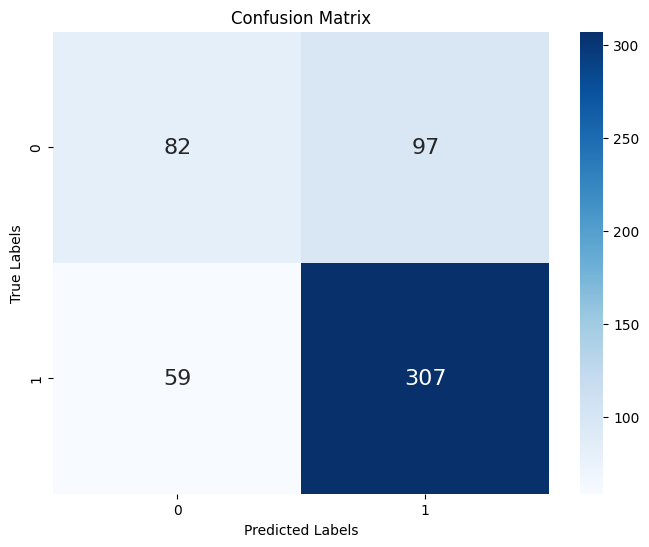

In [89]:
cm = confusion_matrix(Y_test, tf.round(y_preds))
display(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# NLTK Vader

In [114]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # Download the VADER lexicon

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [115]:
analyzer = SentimentIntensityAnalyzer()

In [116]:
sentiments_tweet = []

def vader_analyzer(text):
  sents = analyzer.polarity_scores(text)
  return sents

for idx in range(len(normalized_stemming)):
  sents = vader_analyzer(normalized_stemming[idx])
  sentiments_tweet.append(sents)

display(normalized_stemming[1])
display(sentiments_tweet[1])

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

# Pretrained Spell Checker

In [ ]:
model_spell = FastText.load_fasttext_format('cc.id.300.bin')

<ipython-input-143-80ff43b6e81c>:1: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model_spell = FastText.load_fasttext_format('cc.id.300.bin')
